In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

In [4]:
# 1. Провести попередній аналіз даних за схемою (дивиться вище).
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
y_df = pd.DataFrame(data['target'], columns=["target"])

In [5]:
# Виведення перших 5 значень в data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# Виведення перших 5 значень target
y_df.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
# Перевірка даних на наявність нулів
X.isna().sum(), y_df.isna().sum()

(MedInc        0
 HouseAge      0
 AveRooms      0
 AveBedrms     0
 Population    0
 AveOccup      0
 Latitude      0
 Longitude     0
 dtype: int64,
 target    0
 dtype: int64)

In [8]:
# Перевірка дуплікатів
X.duplicated().sum()

0

In [9]:
# Перевірка типів
X.dtypes, y_df.dtypes

(MedInc        float64
 HouseAge      float64
 AveRooms      float64
 AveBedrms     float64
 Population    float64
 AveOccup      float64
 Latitude      float64
 Longitude     float64
 dtype: object,
 target    float64
 dtype: object)

In [12]:
# Обчислення кореляції та виведення теплової карти
X_corr = pd.concat([X, y_df], axis = 1)
X_corr.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


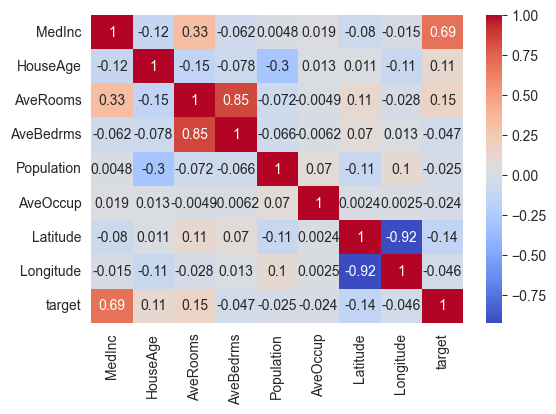

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(X_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# 3. Поділити дані на тренувальні і тестові.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. Масштабувати ознаки.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(X_scaled, columns = X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [15]:
# 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}


param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}


for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train_std, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train_std, y_train)
        print(f"{name} не потребує налаштування параметрів.")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}


In [16]:
# 5. Вивести R^2 і MSE. Побудувати графіки.
for name, model in best_models.items():
    y_pred = model.predict(X_test_std)
    mse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Оцінка Linear Regression:
Mean Squared Error: 0.75
R^2 Score: 0.58

Оцінка Ridge Regression:
Mean Squared Error: 0.75
R^2 Score: 0.58

Оцінка Random Forest Regressor:
Mean Squared Error: 0.50
R^2 Score: 0.81


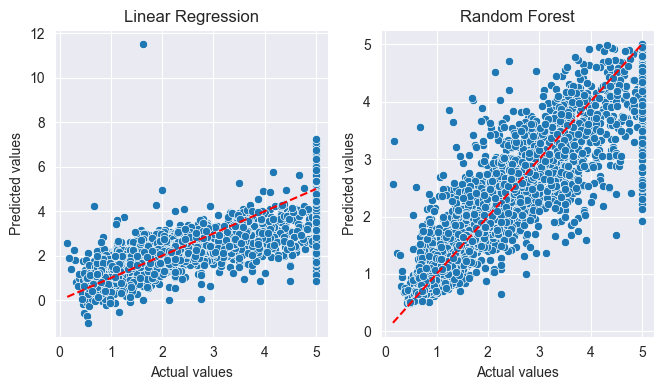

In [17]:
# Побудовування графіків.
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test_std))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test_std))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# 6. Вивести справжні і прогнозовані значення.
for name, model in best_models.items():
    print(f"\nСправжні і прогнозовані значення {name}:")
    act_pred_df = pd.DataFrame(data = {"Actual": y_test, "Predicted": y_pred})
    print(act_pred_df)


Справжні і прогнозовані значення Linear Regression:
       Actual  Predicted
0     0.47700   0.488655
1     0.45800   0.725450
2     5.00001   4.845367
3     2.18600   2.557850
4     2.78000   2.283075
...       ...        ...
4123  2.63300   2.255700
4124  2.66800   2.029475
4125  5.00001   4.795753
4126  0.72300   0.706840
4127  1.51500   1.639625

[4128 rows x 2 columns]

Справжні і прогнозовані значення Ridge Regression:
       Actual  Predicted
0     0.47700   0.488655
1     0.45800   0.725450
2     5.00001   4.845367
3     2.18600   2.557850
4     2.78000   2.283075
...       ...        ...
4123  2.63300   2.255700
4124  2.66800   2.029475
4125  5.00001   4.795753
4126  0.72300   0.706840
4127  1.51500   1.639625

[4128 rows x 2 columns]

Справжні і прогнозовані значення Random Forest Regressor:
       Actual  Predicted
0     0.47700   0.488655
1     0.45800   0.725450
2     5.00001   4.845367
3     2.18600   2.557850
4     2.78000   2.283075
...       ...        ...
4123  2.633